# Principal Component Analysis (PCA)

The goal in dimensionality reduction is to reduce the number of features in a dataset without significantly impacting the predictive performance of a model. PCA transforms the original set of features into a new set of ordered features by decreasing content of information. The PCA steps are:
1.	 Standardize the d-dimensional dataset.
2.	 Construct the covariance matrix.
3.	 Decompose the covariance matrix into its eigenvectors and eigenvalues.
4.	 Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ( k ≤ d ).
5.	 Construct a projection matrix W from the "top" k eigenvectors.
6.	 Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

The transformation for the input dataset X, is the following

$$X'=X \cdot W$$

where $X \in \mathbb{R}^d$, $W \in \mathbb{R}^{d \times k}$ and $X' \in \mathbb{R}^k$.

In [1]:
import org.apache.spark.sql.functions._
import org.apache.spark.ml.linalg.Vectors
import org.apache.spark.ml.linalg.DenseVector
import org.apache.spark.ml.feature.{VectorAssembler,StringIndexer}
import org.apache.spark.ml.feature.StandardScaler
import org.apache.spark.ml.feature.PCA
import org.apache.spark.ml.Pipeline
import breeze.plot._
import convert.jfc.tohtml

## Load the dataset

In [2]:
val df = spark.read.
  format("csv").
  option("header", "true").
  option("inferschema", "true").
  load("../Datasets/Iris.csv")
  //option("delimiter",";")

df = [sepal_length: double, sepal_width: double ... 3 more fields]


[sepal_length: double, sepal_width: double ... 3 more fields]

## Explore the dataset

In [3]:
df.show(10)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 10 rows



In [4]:
df.printSchema

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [5]:
df.columns

[sepal_length, sepal_width, petal_length, petal_width, species]

In [6]:
df.columns.length

5

In [7]:
df.count

150

In [8]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|
+-------+------------------+-------------------+------------------+------------------+
|  count|               150|                150|               150|               150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|
|    min|               4.3|                2.0|               1.0|               0.1|
|    max|               7.9|                4.4|               6.9|               2.5|
+-------+------------------+-------------------+------------------+------------------+



In [9]:
df.groupBy("species").count.show()

[Stage 11:===================================================>  (190 + 4) / 199]+----------+-----+
|   species|count|
+----------+-----+
| virginica|   50|
|versicolor|   50|
|    setosa|   50|
+----------+-----+



## Apply Vector Assembler and String Indexer

In [10]:
val features = df.columns.slice(0, df.columns.length -1)

features = Array(sepal_length, sepal_width, petal_length, petal_width)


[sepal_length, sepal_width, petal_length, petal_width]

In [11]:
val assembler = new VectorAssembler().
  setInputCols(features).//setInputCols(Array("_c1", "_c2")).
  setOutputCol("features")

assembler = vecAssembler_863f90f78f7a


vecAssembler_863f90f78f7a

In [12]:
val indexer = new StringIndexer().
  setInputCol("species").
  setOutputCol("label")

indexer = strIdx_6f23a5df332c


strIdx_6f23a5df332c

In [13]:
val pipeline = new Pipeline().
  setStages(Array(assembler, indexer))

pipeline = pipeline_4230f93bb32e


pipeline_4230f93bb32e

In [14]:
val df_v = pipeline.fit(df).transform(df).select("features","label")
df_v.show()

+-----------------+-----+
|         features|label|
+-----------------+-----+
|[5.1,3.5,1.4,0.2]|  2.0|
|[4.9,3.0,1.4,0.2]|  2.0|
|[4.7,3.2,1.3,0.2]|  2.0|
|[4.6,3.1,1.5,0.2]|  2.0|
|[5.0,3.6,1.4,0.2]|  2.0|
|[5.4,3.9,1.7,0.4]|  2.0|
|[4.6,3.4,1.4,0.3]|  2.0|
|[5.0,3.4,1.5,0.2]|  2.0|
|[4.4,2.9,1.4,0.2]|  2.0|
|[4.9,3.1,1.5,0.1]|  2.0|
|[5.4,3.7,1.5,0.2]|  2.0|
|[4.8,3.4,1.6,0.2]|  2.0|
|[4.8,3.0,1.4,0.1]|  2.0|
|[4.3,3.0,1.1,0.1]|  2.0|
|[5.8,4.0,1.2,0.2]|  2.0|
|[5.7,4.4,1.5,0.4]|  2.0|
|[5.4,3.9,1.3,0.4]|  2.0|
|[5.1,3.5,1.4,0.3]|  2.0|
|[5.7,3.8,1.7,0.3]|  2.0|
|[5.1,3.8,1.5,0.3]|  2.0|
+-----------------+-----+
only showing top 20 rows



df_v = [features: vector, label: double]


[features: vector, label: double]

## Scale the features

In [15]:
val scaler = new StandardScaler().
  setInputCol("features").
  setOutputCol("scaledFeatures")

scaler = stdScal_28d5078270ef


stdScal_28d5078270ef

In [16]:
val df_s = scaler.fit(df_v).transform(df_v)

df_s = [features: vector, label: double ... 1 more field]


[features: vector, label: double ... 1 more field]

## Dimensionality Reduction with PCA

In [17]:
val pca = new PCA().
    setInputCol("scaledFeatures").
    setOutputCol("pcaFeatures").
    setK(2)

pca = pca_b01ee6eb90f5


pca_b01ee6eb90f5

In [18]:
val df_p = pca.fit(df_s).transform(df_s)

df_p = [features: vector, label: double ... 2 more fields]


[features: vector, label: double ... 2 more fields]

In [19]:
df_p.show(10)

+-----------------+-----+--------------------+--------------------+
|         features|label|      scaledFeatures|         pcaFeatures|
+-----------------+-----+--------------------+--------------------+
|[5.1,3.5,1.4,0.2]|  2.0|[6.15892840883878...|[-1.7008636408214...|
|[4.9,3.0,1.4,0.2]|  2.0|[5.9174018045706,...|[-1.8783851549940...|
|[4.7,3.2,1.3,0.2]|  2.0|[5.67587520030241...|[-1.5978001923052...|
|[4.6,3.1,1.5,0.2]|  2.0|[5.55511189816831...|[-1.6613406138855...|
|[5.0,3.6,1.4,0.2]|  2.0|[6.03816510670469...|[-1.5770426874367...|
|[5.4,3.9,1.7,0.4]|  2.0|[6.52121831524107...|[-1.8942207975522...|
|[4.6,3.4,1.4,0.3]|  2.0|[5.55511189816831...|[-1.5202989381570...|
|[5.0,3.4,1.5,0.2]|  2.0|[6.03816510670469...|[-1.7314610064823...|
|[4.4,2.9,1.4,0.2]|  2.0|[5.31358529390013...|[-1.6237061774493...|
|[4.9,3.1,1.5,0.1]|  2.0|[5.9174018045706,...|[-1.7764763044699...|
+-----------------+-----+--------------------+--------------------+
only showing top 10 rows



## Plot the first two principal components

In [20]:
val x1 = df_p.select("pcaFeatures").collect.map(row=>row(0).asInstanceOf[DenseVector](0))

x1 = Array(-1.7008636408214346, -1.8783851549940478, -1.597800192305247, -1.6613406138855684, -1.5770426874367196, -1.8942207975522354, -1.5202989381570455, -1.7314610064823877, -1.6237061774493644, -1.7764763044699745, -1.8015813990792064, -1.6382374187586244, -1.741187558292187, -1.3269417814262463, -1.7728726239179156, -1.7138964933624494, -1.7624485738747564, -1.7749779157017282, -2.0700941196997897, -1.6257080769316516, -2.049680405607393, -1.7605599833750938, -1.1929371764729746, -2.1435108963467235, -1.7370665865167336, -2.007354588654353, -1.9126326121623447, -1.7968900185623713, -1.824684594206151, -1.6966293600633562, -1.8204503134480712, -2.132022843529241, -1.3583499543031838, -1.5280335071656577, -1.7764763044699745, -1.7541071018505763, -1.9202538721883309, ...


[-1.7008636408214346, -1.8783851549940478, -1.597800192305247, -1.6613406138855684, -1.5770426874367196, -1.8942207975522354, -1.5202989381570455, -1.7314610064823877, -1.6237061774493644, -1.7764763044699745, -1.8015813990792064, -1.6382374187586244, -1.741187558292187, -1.3269417814262463, -1.7728726239179156, -1.7138964933624494, -1.7624485738747564, -1.7749779157017282, -2.0700941196997897, -1.6257080769316516, -2.049680405607393, -1.7605599833750938, -1.1929371764729746, -2.1435108963467235, -1.7370665865167336, -2.007354588654353, -1.9126326121623447, -1.7968900185623713, -1.824684594206151, -1.6966293600633562, -1.8204503134480712, -2.132022843529241, -1.3583499543031838, -1.5280335071656577, -1.7764763044699745, -1.7541071018505763, -1.9202538721883309, -1.7764763044699745, -1.5300254899668455, -1.7945443283039537, -1.6789515379607924, -2.0923865076107493, -1.4085502268405474, -2.000123530359783, -1.8315945754894243, -1.8894161080527745, -1.5845368579707277, -1.5676599264030497

In [21]:
val x2 = df_p.select("pcaFeatures").collect.map(row=>row(0).asInstanceOf[DenseVector](1))

x2 = Array(-9.798112476165109, -8.640880678324866, -8.976683127367169, -8.720650458966217, -9.96661148272853, -10.80757533867312, -9.368410789070643, -9.540884243679617, -8.202607301741613, -8.846965954487347, -10.361118028393015, -9.452155017757546, -8.587346593832775, -8.358947926562632, -11.177765120852797, -12.00737840334759, -10.80279308233496, -9.806684165653895, -10.720429432627522, -10.44826393443861, -9.723124951861918, -10.243374222360671, -9.78197964637715, -9.400491433751634, -9.455741710011164, -8.68823420149725, -9.559223186741729, -9.844270435252954, -9.629613469601686, -8.980269819620789, -8.811770813057368, -9.73787720267041, -11.116467155164525, -11.472191867145414, -8.846965954487347, -9.110374748292546, -9.97676649209379, -8.846965954487347, -8.4148731...


[-9.798112476165109, -8.640880678324866, -8.976683127367169, -8.720650458966217, -9.96661148272853, -10.80757533867312, -9.368410789070643, -9.540884243679617, -8.202607301741613, -8.846965954487347, -10.361118028393015, -9.452155017757546, -8.587346593832775, -8.358947926562632, -11.177765120852797, -12.00737840334759, -10.80279308233496, -9.806684165653895, -10.720429432627522, -10.44826393443861, -9.723124951861918, -10.243374222360671, -9.78197964637715, -9.400491433751634, -9.455741710011164, -8.68823420149725, -9.559223186741729, -9.844270435252954, -9.629613469601686, -8.980269819620789, -8.811770813057368, -9.73787720267041, -11.116467155164525, -11.472191867145414, -8.846965954487347, -9.110374748292546, -9.97676649209379, -8.846965954487347, -8.4148731392238, -9.585846638682922, -9.76052620656605, -6.9741774127488085, -8.841795942357253, -9.78982796728603, -10.461617880265555, -8.604489972810347, -10.440887809034365, -8.932916296448404, -10.31615563338971, -9.32622727802835, 

In [22]:
val fig = Figure()
val plt = fig.subplot(0)

fig = breeze.plot.Figure@78b3cd38
plt = breeze.plot.Plot@fd12ed


breeze.plot.Plot@fd12ed

In [23]:
val c = df_p.select("label").as[Double].collect.map(
    Map(
        0.0 -> java.awt.Color.red, 
        1.0 -> java.awt.Color.blue,  
        2.0 -> java.awt.Color.green
       ))

plt += scatter(x1, x2, size = x1.map(i=>0.1), colors = c)

plt.legend = true
plt.title = "PCA Iris"
plt.xlabel = "x1"
plt.ylabel = "x2"

c = Array(java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g...


[java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.aw


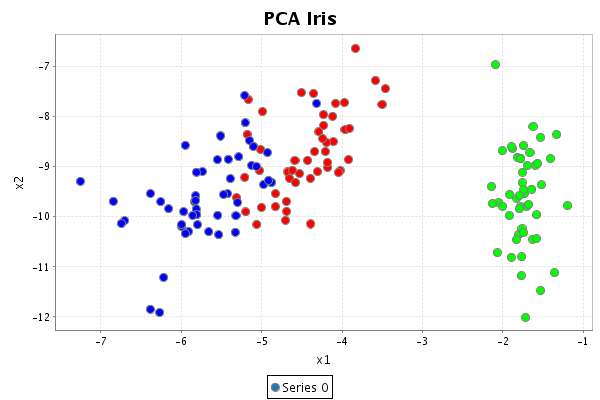

In [24]:
kernel.magics.html(tohtml(plt.chart))